In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from keras.datasets import mnist

import warnings
warnings.filterwarnings("ignore")

2021-11-22 17:37:36.159254: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-22 17:37:36.159272: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# load dataset and divide into train and test
(_, _), (X, y) = mnist.load_data()

In [3]:
X = X.reshape(10000, 28*28)

In [4]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# normalizing the data
X = X / 255

In [6]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)

In [7]:
len(pca.explained_variance_ratio_)

149

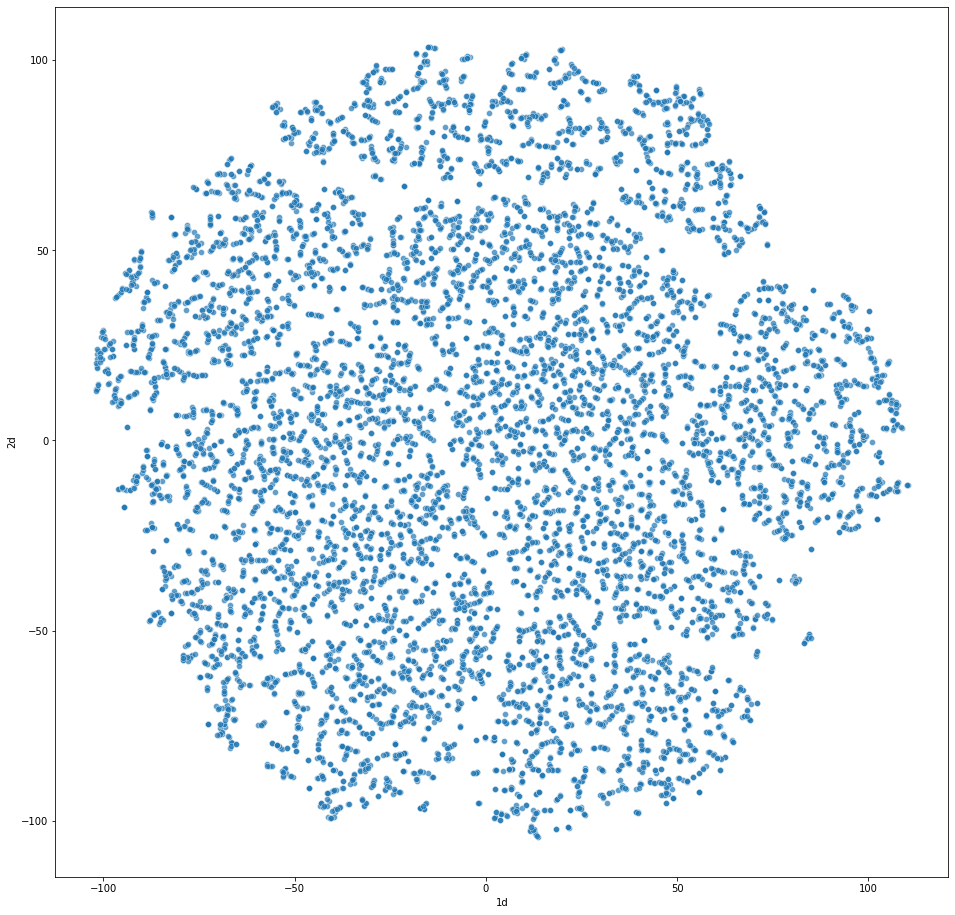

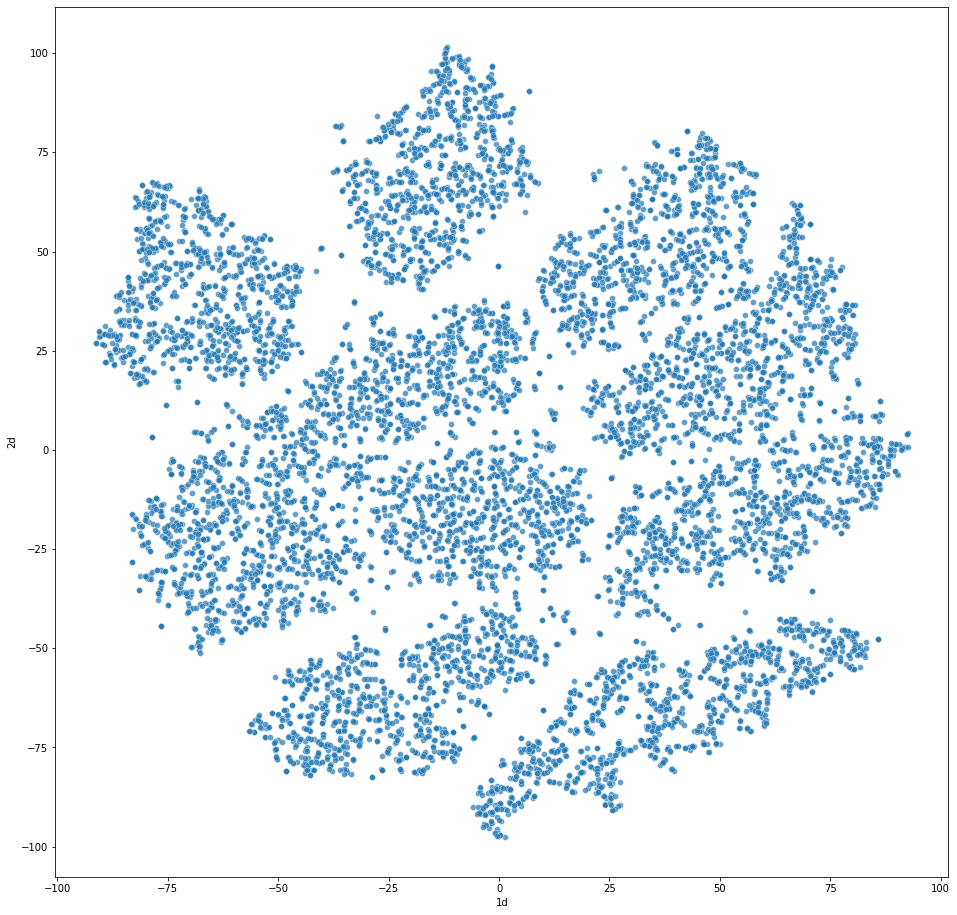

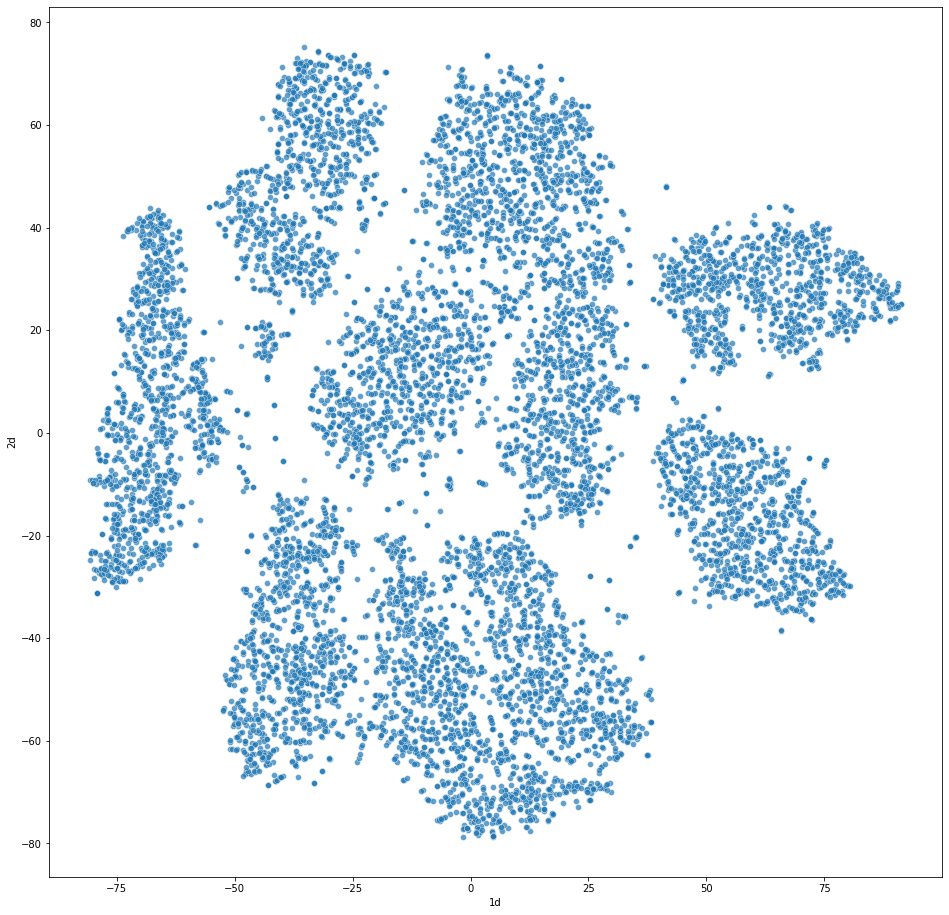

In [8]:
list_perp = [5, 15, 30]

for perp in list_perp:
    X_embedded = TSNE(n_components=2,
                      learning_rate='auto',
                      init='random',
                      perplexity=perp).fit_transform(X_pca)
    
    df_tsne = pd.DataFrame()
    df_tsne["1d"] = X_embedded[:, 0]
    df_tsne["2d"] = X_embedded[:, 1]
    df_tsne["real_classes"] = y


    plt.figure(figsize=(16, 16))
    sns.scatterplot(x="1d", y="2d", data=df_tsne, legend="full", alpha=0.7)

In [9]:
# kmeans
for n_clusters in range(2, 20):
    cluster = KMeans(n_clusters = n_clusters)
    preds = cluster.fit_predict(df_tsne[["1d", "2d"]])
    centers = cluster.cluster_centers_
    
    score = silhouette_score(df_tsne[["1d", "2d"]], preds)
    print(f"cluster {n_clusters}, silhouette score: {score}")

cluster 2, silhouette score: 0.36422181129455566
cluster 3, silhouette score: 0.41880765557289124
cluster 4, silhouette score: 0.4170146584510803
cluster 5, silhouette score: 0.4007582366466522
cluster 6, silhouette score: 0.39685481786727905
cluster 7, silhouette score: 0.4308176636695862
cluster 8, silhouette score: 0.45597973465919495
cluster 9, silhouette score: 0.4719545841217041
cluster 10, silhouette score: 0.4664013087749481
cluster 11, silhouette score: 0.45844483375549316
cluster 12, silhouette score: 0.45445162057876587
cluster 13, silhouette score: 0.44819891452789307
cluster 14, silhouette score: 0.44125252962112427
cluster 15, silhouette score: 0.4397170841693878
cluster 16, silhouette score: 0.4333915114402771
cluster 17, silhouette score: 0.4348817467689514
cluster 18, silhouette score: 0.4228401482105255
cluster 19, silhouette score: 0.42588865756988525


In [10]:
def kmeans_with_plot(X, n_clusters, seed):
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=seed)
    kmeans.fit(X)
    
    # labels
    X["class"] = kmeans.labels_
    
    # scatter plot
    plt.figure(figsize=(16, 16))
    sns.scatterplot(data=X, x="1d", y="2d", hue="class", palette="bright");

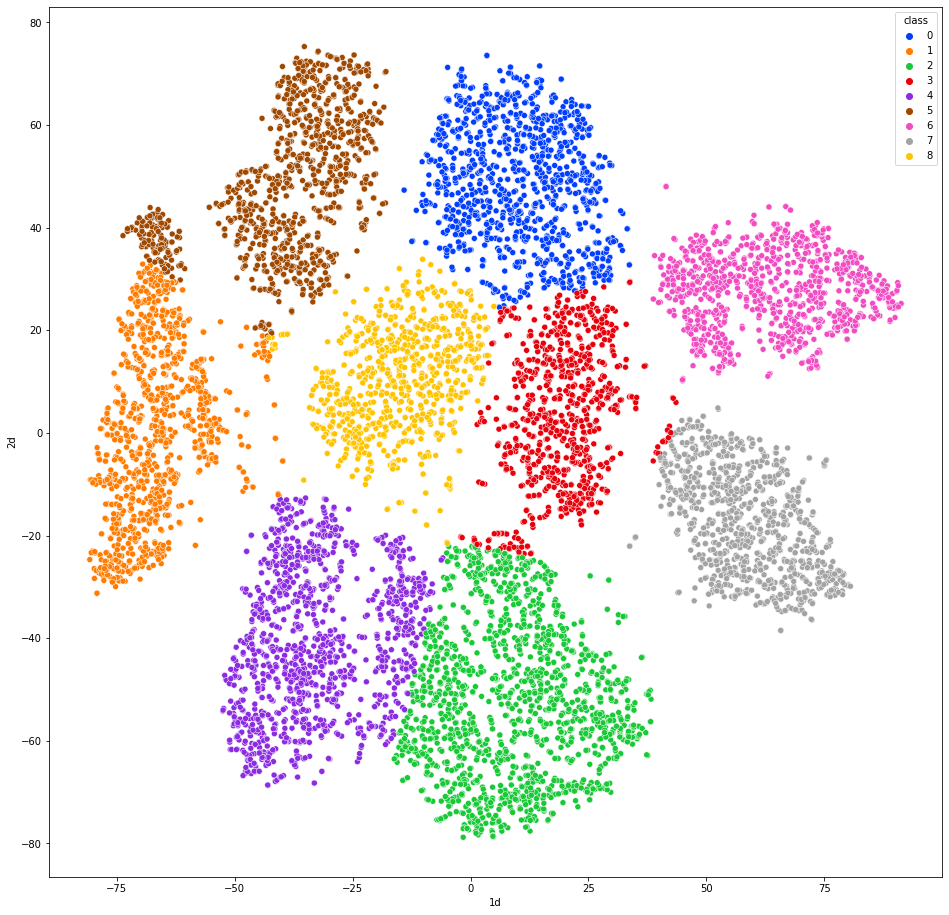

In [11]:
kmeans_with_plot(df_tsne, 9, 0)

<AxesSubplot:xlabel='1d', ylabel='2d'>

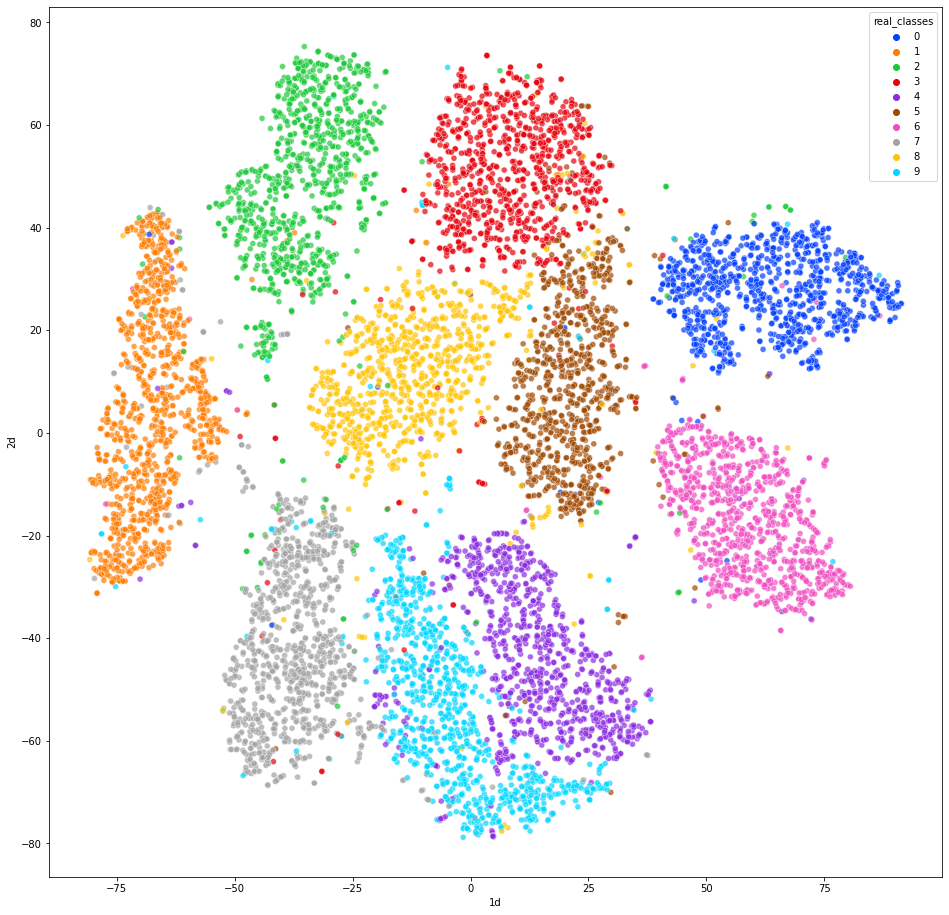

In [12]:
plt.figure(figsize=(16, 16))
sns.scatterplot(x="1d", y="2d", data=df_tsne, legend="full", alpha=0.7, hue="real_classes", palette="bright")